## 1. Понимание задачи

### Цель:
Предсказать качество вина по его физикохимическим свойствам

### Данные:
Датасет Wine Quality

https://www.kaggle.com/datasets/rajyellow46/wine-quality

### Описание 
В датасете содержатся данные о физикохимических (input) и вкусовых (output) свойствах португальского вина "Vinho Verde". Помимо физикохимических свойств вина, во входных данных нет никакой другой информации (т. е. нет, например, данных о типе винограда, марке вина, его стоимости и т. д.). Вперемешку приведены данные о красных и белых винах.

### Рекомендации от Kaggle:
Датасет подходит для задач регрессии или классификации. Классы упорядочены и несбалансированы (т. е. средних вин гораздо больше, чем очень хороших или некачественных). Чтобы выявить такие вина, можно использовать алгоритмы поиска выбросов. Кроме того, входные данные могут быть нерелевантны, так что, возможно, стоит попробовать методы feature selection.
Несколько случайных значений были удалены (значит, в датасете есть пропуски).

Входные данные (получены с помощью физикохимических тестов):

* *Спасибо Google translate за перевод*

1. - фиксированная кислотность (fixed acidity)
2. - летучая кислотность (volatile acidity)
3. - лимонная кислота (citric acid)
4. - остаточный сахар (residual sugar)
5. - хлориды (chlorides)
6. - свободный диоксид серы (free sulfur dioxide)
7. - общий диоксид серы (total sulfur dioxide)
8. - плотность (density)
9. - pH
10. - сульфаты (sulphates)
11. - спирт (alcohol)

Результирующая переменная (на основе сенсорного восприятия):

12. - качество (оценка от 0 до 10)

## 2. Анализ данных

Импортирование библиотек

In [448]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier

Импортирование данных

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Информация о типе данных и о пропусках

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Общее количество строк с пропусками

In [31]:
data_filtered = data[
    (data['fixed acidity'] != data['fixed acidity']) |
    (data['volatile acidity'] != data['volatile acidity']) |
    (data['citric acid'] != data['citric acid']) |
    (data['residual sugar'] != data['residual sugar']) |
    (data['chlorides'] != data['chlorides']) |
    (data.pH != data.pH) |
    (data.sulphates != data.sulphates)
]
len(data_filtered)

34

In [140]:
data_filtered

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


Распределение выборки по классам. Выяснилось, что представлены только 7 классов из 10 заявленных. Кроме того, данные действительно распределяются неравномерно: так, в классе 9 - только 5 объектов.

<AxesSubplot:xlabel='count', ylabel='quality'>

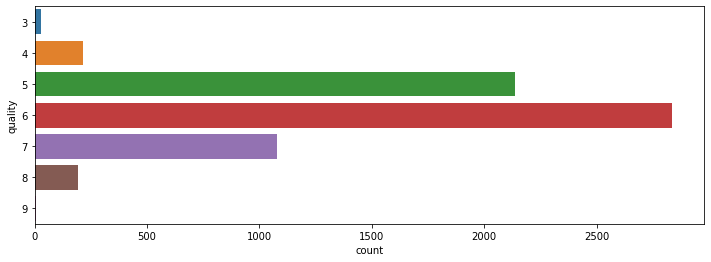

In [59]:
plt.figure(figsize = (12, 4))
sns.countplot(y=data.quality)

In [23]:
data['quality'].groupby(data.quality).count()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [103]:
data[data.quality==9]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


Влияние типа вина на его качество. По графику не очень понятно, насколько велико это влияние. Тем не менее распределения отличаются.

In [119]:
#Распределение данных по типу вина
data['type'].groupby(data.type).count()

type
red      1599
white    4898
Name: type, dtype: int64

<bound method Figure.show of <Figure size 864x288 with 2 Axes>>

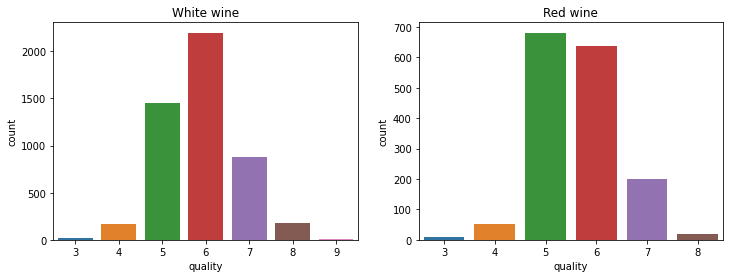

In [112]:
fig = plt.figure(figsize = [12, 4])
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.countplot(x=data[data.type=='white'].quality)
ax1.set_title('White wine')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(x = data[data.type=='red'].quality)
ax2.set_title('Red wine')

fig.show

Провела статистические тесты для определения схожести выборок. Полученные данные позволяют считать, что распределения в выборках различны. Следовательно, тип вина влияет на его качество.

In [116]:
print(stats.ttest_ind(data[data.type=='white'].quality, data[data.type=='red'].quality))
print(stats.mannwhitneyu(data[data.type=='white'].quality, data[data.type=='red'].quality))

Ttest_indResult(statistic=9.685649554187696, pvalue=4.888069044201508e-22)
MannwhitneyuResult(statistic=4520388.0, pvalue=3.6343410707988e-23)


Теперь посмотрим на данные в числовых столбцах. Видно, что данные распределены неравномерно, очень много выбросов.

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<bound method Figure.show of <Figure size 1152x720 with 11 Axes>>

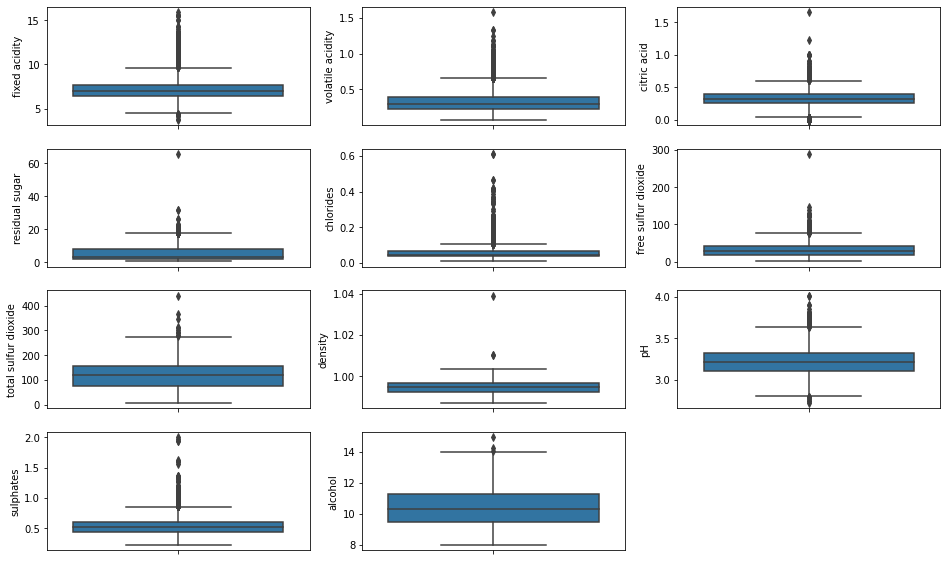

In [118]:
fig = plt.figure(figsize = [16, 10])
for n, col in enumerate(data.columns[1:-1], 1):
    ax = fig.add_subplot(4, 3, n)
    ax = sns.boxplot(y = data[col])
fig.show

Отдельные строки с выбросами. Есть ощущение, что высокие значения free sulfur dioxide понижают качество вина. Есть также ощущение, что со строчкой 2781 что-то не так: в ней выбросы по нескольким столбцам. Больше пока ничего не понятно.

In [91]:
data[data.density > 1.01]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,white,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [92]:
data[data['free sulfur dioxide'] > 120]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,white,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
659,white,6.8,0.290,0.16,1.4,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
1931,white,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
2334,white,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5
3050,white,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
3307,white,9.4,0.240,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
4745,white,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


Матрица корреляций. Похоже, на качество вина больше всего влияют количество спирта и плотность, а также летучая кислотность и хлориды. Спирт и плотность имеют сильную отрицательную корреляцию, парные столбцы (кислотность и диоксиды) - сильную положительную.

<AxesSubplot:>

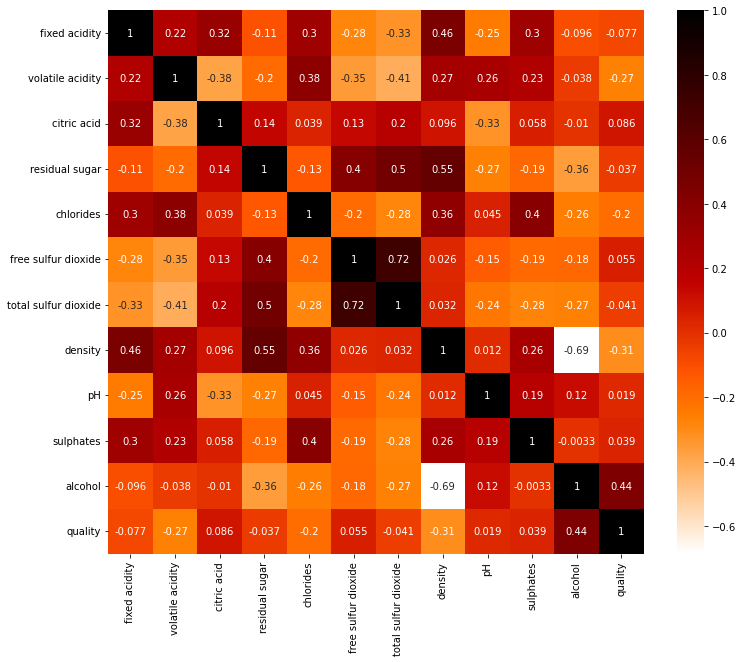

In [37]:
corr = data.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, cmap='gist_heat_r', annot=True)

## 3. Подготовка данных

Что нужно сделать:

* Обработать категориальную переменную type
* Решить вопрос с пропусками
* Решить вопрос с выбросами
* Стандартизировать данные
* Решить вопрос с неравномерным распределением классов

In [433]:
# Категориальную переменную заменяю на бинарный столбец (one hot encoding)
data['color'] = data['type'].apply(lambda x: 1 if x == 'red' else 0)
data_next = data.iloc[:, 1:]
data_next.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [434]:
# Пропуски удаляю. Их не так много, кроме того, в данных много выбросов, и среднему значению веры особо нет.
data_next = data_next.dropna()
data_next.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  color                 6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [435]:
# Удаляю самые бессовестные выбросы
data_next = data_next[~(
    (data_next['residual sugar'] > 40) | 
    (data_next.chlorides > 0.4) |
    (data_next['free sulfur dioxide'] > 200) |
    (data_next.density > 1.02))
    ]

In [436]:
# Для стандартизации данных использую RobustScaler, который вроде как должен быть устойчив к выбросам.
data_next.iloc[:, :-2] = RobustScaler().fit_transform(data_next.iloc[:, :-2])
data_next

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.000000,-0.117647,0.357143,2.809524,-0.074074,0.666667,0.666667,1.309091,-1.000000,-0.352941,-0.833333,6,0
1,-0.538462,0.058824,0.214286,-0.222222,0.074074,-0.625000,0.179487,-0.188235,0.428571,-0.117647,-0.444444,6,0
2,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.269231,0.047059,0.238095,-0.411765,-0.111111,6,0
3,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.871795,0.154011,-0.095238,-0.647059,-0.222222,6,0
4,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.871795,0.154011,-0.095238,-0.647059,-0.222222,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.153846,1.941176,-1.642857,-0.174603,0.777778,-0.041667,-1.025641,0.348663,1.000000,1.823529,-0.444444,6,1
6492,-0.615385,1.823529,-1.642857,-0.158730,1.592593,0.125000,-0.948718,0.004278,1.142857,0.411765,0.111111,5,1
6494,-0.538462,1.294118,-1.285714,-0.111111,1.074074,0.000000,-1.000000,0.183957,1.000000,1.411765,0.388889,6,1
6495,-0.846154,2.088235,-1.357143,-0.158730,1.037037,0.125000,-0.948718,0.126203,1.714286,1.176471,-0.055556,5,1


In [437]:
# Разделяю данные на признаки и таргет
X = data_next.iloc[:, :-1]
y = data_next.quality
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6448 non-null   float64
 1   volatile acidity      6448 non-null   float64
 2   citric acid           6448 non-null   float64
 3   residual sugar        6448 non-null   float64
 4   chlorides             6448 non-null   float64
 5   free sulfur dioxide   6448 non-null   float64
 6   total sulfur dioxide  6448 non-null   float64
 7   density               6448 non-null   float64
 8   pH                    6448 non-null   float64
 9   sulphates             6448 non-null   float64
 10  alcohol               6448 non-null   float64
 11  quality               6448 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 654.9 KB


In [438]:
# Привожу таргет к нормальному виду (последовательная нумерация с нуля)
y_trans = LabelEncoder().fit_transform(y)
y_trans

array([3, 3, 3, ..., 3, 2, 3], dtype=int64)

In [439]:
# Добавляю примеров в миноритарные классы
X_res, y_res = ADASYN(random_state=42, n_neighbors=4).fit_resample(X, y_trans)

In [440]:
from collections import Counter
print(Counter(y))
print(Counter(y_trans))
print(Counter(y_res))

Counter({6: 2816, 5: 2119, 7: 1074, 4: 213, 8: 192, 3: 29, 9: 5})
Counter({3: 2816, 2: 2119, 4: 1074, 1: 213, 5: 192, 0: 29, 6: 5})
Counter({4: 2863, 5: 2825, 0: 2819, 3: 2816, 6: 2816, 2: 2801, 1: 2801})


In [441]:
# Разделяю все на train и test
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=.3, random_state = 42)

## 4. Моделирование
Буду использовать логистическую регрессию и KNeighborsClassifier

In [461]:
logit = LogisticRegression(solver='liblinear')

In [462]:
logit.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [467]:
KN = KNeighborsClassifier()

In [473]:
KN.fit(X_train, y_train)

KNeighborsClassifier()

## 5. Оценка
У меня очень много сгенерированных данных, поэтому проверю accuracy не только на валидационной, но и на исходной выборке.

In [474]:
logit.score(X_train, y_train)

0.7336083369518019

In [475]:
logit.score(X_val, y_val)

0.7286847881141314

In [476]:
logit.score(X, y_trans)

0.5410980148883374

Text(0.5, 1.0, 'LogisticRegression confusion matrix')

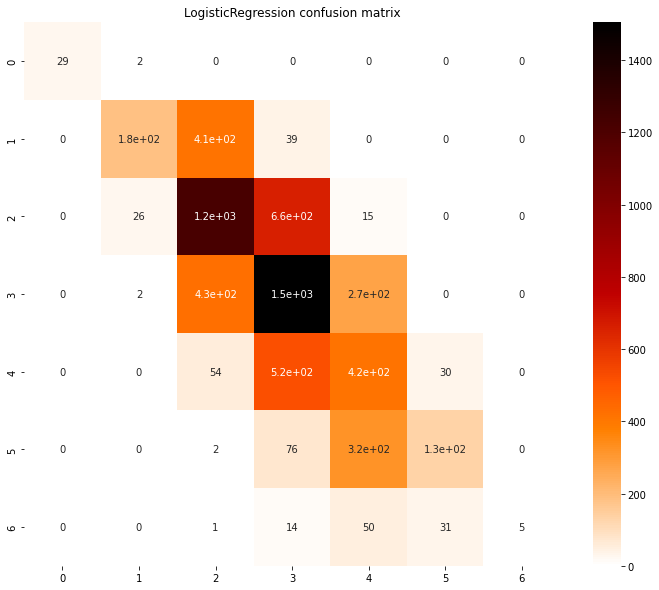

In [494]:
plt.figure(figsize = [12, 10])
ax = sns.heatmap(confusion_matrix(logit.predict(X), y_trans), cmap='gist_heat_r', annot=True)
ax.set_title('LogisticRegression confusion matrix')

In [477]:
KN.score(X_train, y_train)

0.992039368939065

In [478]:
KN.score(X_val, y_val)

0.9886881647813608

In [479]:
KN.score(X, y_trans)

0.9742555831265509

Text(0.5, 1.0, 'KNearestNeighbors confusion matrix')

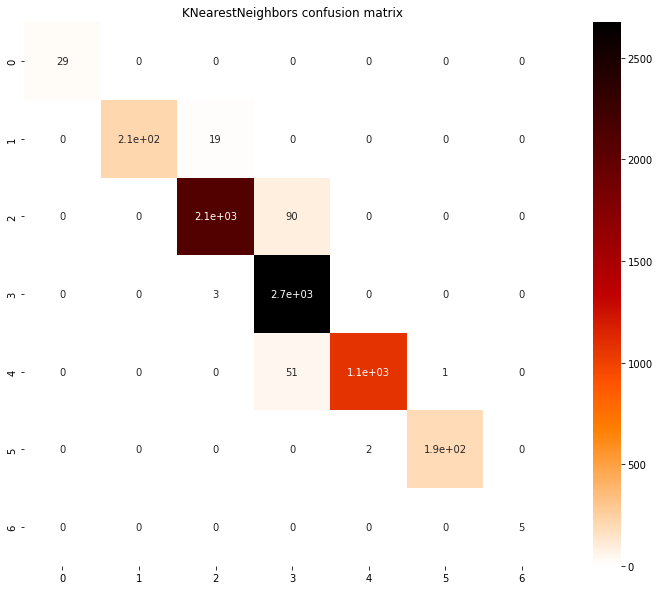

In [493]:
plt.figure(figsize = [12, 10])
ax = sns.heatmap(confusion_matrix(KN.predict(X), y_trans), cmap='gist_heat_r', annot=True)
ax.set_title('KNearestNeighbors confusion matrix')

## 6. Развертывание
В Kaggle закрыта возможность отправить submit, поэтому этот этап придется пропустить. Нет полной уверенности, как модель KN покажет себя в полевых условиях, но выглядит перспективно.